Covid Impact on Study
                         ............  .................           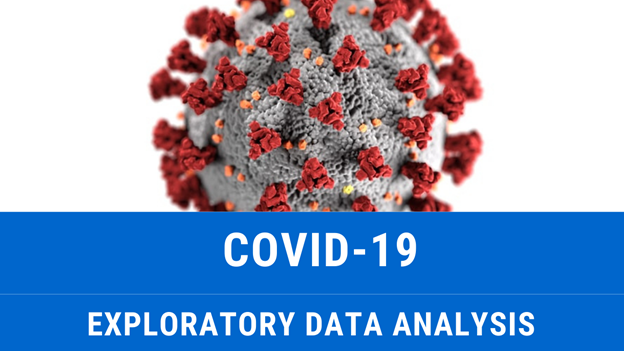

# Import Libraries

In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from cycler import cycler

plt.style.use('grayscale')
from wordcloud import WordCloud
import missingno as msno
import plotly.express as px

# Read files 
 1- District Info
 
 2- Products Info
 

In [ ]:
df_dist=pd.read_csv('../input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv')
df_dist.head()

## Locale count plot

let's see what is count of district   

In [ ]:
df_locale=df_dist.groupby(by=df_dist['locale']).count().reset_index()
display(df_locale)

In [ ]:
sns.set_theme(style="whitegrid")
fig_dims=(20,10)

fig, ax = plt.subplots(figsize=fig_dims)

g=sns.countplot(x=df_dist["locale"], data=df_locale,palette='terrain', ax=ax)
g.set(title=" District Count")




for bar in g.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    g.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points',color='blue')


In [ ]:

labels=list(df_locale['locale'])
value=list(df_locale['district_id'])


explode=[]

for i in range(len(value)):
    index=value.index(max(value))
    explode.append(0)    
explode[index]=0.05


In [ ]:

fig1, ax1 = plt.subplots(figsize=fig_dims)
ax1.pie(value, 
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%',
        shadow=True, startangle=90,pctdistance=0.7)
ax1.axis('equal')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
df_state=df_dist.groupby(by=df_dist['locale']).size()


In [ ]:
sns.set_theme(style="whitegrid")

fig_dims=(20,10)

fig, ax = plt.subplots(figsize=fig_dims)

g=sns.countplot(x=df_dist["state"], data=df_state,palette='winter' ,ax=ax,order=df_dist.state.value_counts().index)
g.set_xticklabels(g.get_xticklabels(),rotation=45,fontsize='x-large',horizontalalignment='right',color='#b07d0e')

for bar in g.patches:

  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    g.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points',color='#5234eb')

In [ ]:
df_prod_info=pd.read_csv('../input/learnplatform-covid19-impact-on-digital-learning/products_info.csv')

df_prod_info

In [ ]:
df_prod_info.columns

In [ ]:
df_prod_info.info()

In [ ]:
df_company=df_prod_info.groupby(['Provider/Company Name']).size().sort_values(ascending=False)

# Top 'N' provider company

In [ ]:
df_company

In [ ]:
top_n_company=15
df_company=df_company[:top_n_company]
df_company

In [ ]:
fig, ax = plt.subplots(figsize=fig_dims)
g=sns.countplot(x=df_prod_info["Provider/Company Name"], data=df_company,palette="cool",ax=ax,
                order=df_company.index)
g.set_xticklabels(g.get_xticklabels(),rotation=45,fontsize='x-large',horizontalalignment='right',color='red')
g.set_xlabel('Product/company name',fontsize = 20)
g.set_ylabel('Count',fontsize = 20 )

for bar in g.patches:
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    g.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=20, xytext=(0, 8),
                   textcoords='offset points',color='blue')

In [ ]:
df_prod_info.groupby(['Sector(s)']).size().sort_values(ascending=False)



In [ ]:
df_prod_info.head(10)

In [ ]:

sector_dic ={'PreK-12':  0,
             'Higher Ed':0,
             'Corporate':0  }

for i in df_prod_info['Sector(s)']:
    try:
        
        if 'PreK-12' in i :
            sector_dic['PreK-12']= sector_dic['PreK-12']+1    
        if 'Higher Ed' in i :
            sector_dic['Higher Ed']=sector_dic['Higher Ed'] +1
        if 'Corporate' in i :
            sector_dic['Corporate']=sector_dic['Corporate'] +1
            
            # elemenet nan Value
    except:
        #print(i)
        pass


In [ ]:
da=sector_dic.keys()
va=list(sector_dic.values())

In [ ]:

# print(plt.style.available)
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(da, va,color='red')
plt.title('Sector uses')

In [ ]:
df_state_locale=df_dist.groupby(['locale','state']).size().reset_index(name='size')

#df_state_locale

In [ ]:
f, ax = plt.subplots(figsize=(40, 25))
sns.despine(f)
ax = sns.barplot(
    data=df_state_locale,
    x="state", y="size", hue="locale",
    ci="sd",
    palette="Dark2")

ax.set_xticklabels(ax.get_xticklabels(),rotation=45,fontsize='xx-large',horizontalalignment='right',color='red')

ax.legend(title='Locale', fontsize='25', title_fontsize='25',bbox_to_anchor= (1,1))
plt.title('Locale vs State',fontsize='55')

Sub-urbs impact in  all-most in all state  from above graph

 *  ***mainly Connecticut and Massachusetts***

In [ ]:
pef=df_prod_info.groupby(['Primary Essential Function']).size().sort_values(ascending=False).reset_index(name='size')

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))

sns.barplot(y=pef['Primary Essential Function'],x=pef['size'])
sns.lineplot(y=pef['Primary Essential Function'],x=pef['size'],
             color='blue', err_style="bars")

In [ ]:
df_prod_info

Meta and Data Link

engagement data folder:
 *     4 digit of file name link to district_info --> district_id
 *     ip_id --> product_info --> LP_id

In [ ]:
files_dir=os.listdir('../input/learnplatform-covid19-impact-on-digital-learning/engagement_data/')
#files_dir

In [ ]:
df=pd.read_csv('../input/learnplatform-covid19-impact-on-digital-learning/engagement_data/'+ files_dir[0])

In [ ]:
df.head()

In [ ]:
df.info

In [ ]:
df.isnull().sum()

In [ ]:
df.head()

In [ ]:
path='../input/learnplatform-covid19-impact-on-digital-learning/engagement_data'

In [ ]:
def merge_allfiles():
    df_all=[]
    for i in tqdm(files_dir):
        df=(pd.read_csv(os.path.join(path,i)))
        district_id= i[:-4]
        # print(district_id)
        df['district_id']=int(district_id)
        # print(df.iloc[4:10])
        # df=(df.iloc[4:10])
        df_all.append(df)

    df_merge=pd.concat(df_all,ignore_index=True)
    print(df_merge)

    # print(df1)
    # print(df.head)
    # print(df.columns)
    df_merge.to_csv('all_engagement_merger.csv',sep=',',index=False)
    
#merge_allfiles()

In [ ]:
df_merge=pd.read_csv("../input/covid-19-engagement-data/all_engagement_merger.csv")

In [ ]:
df_engagement=df_merge.merge(df_dist,on='district_id')

In [ ]:
df_engagement.agg(['max','min'])

In [ ]:
df_engagement.head()

In [ ]:
df_engagement.info()

> Let's find out the NaN or missing value in total engagement data set after merger to district_info data set

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))

g=sns.countplot(x=df_engagement["pct_black/hispanic"], data=df_engagement, palette="cool",ax=ax,)

g.set_xticklabels(g.get_xticklabels(),rotation=45,fontsize='x-large',horizontalalignment='right',color='red')


In [ ]:
cloud = WordCloud(width=500, height=500).generate(" ".join(df_engagement['state'].astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

**> *From Above word cloud there are many 'state'  inormation are missing.***

Let see if we can fill missing engagement index

In [ ]:
df_engagement.isnull().sum()

In [ ]:
msno.bar(df_engagement,color='orange', sort="ascending", figsize=(10,10), fontsize=12)
plt.show()

In [ ]:
df_engagement['engagement_index'].agg(['max','min','mean','median'])

In [ ]:
df_prod_info=df_prod_info.rename({'LP ID':'lp_id'},axis=1)
df_prod_info.head()

In [ ]:
df_engagement.head()

In [ ]:
df_all=df_engagement.merge(df_prod_info,on='lp_id')

In [ ]:
df_all.head()

In [ ]:
fig = px.line( data_frame=df_all.groupby(["time","locale"])["engagement_index"].sum().reset_index(),
              x=["time"], y="engagement_index",title='engagement index by Locale',
              template="plotly_dark", width=1400, height=500,color='locale')
fig.show()

# From Above plot Suburbs count is high

In [ ]:
fig = px.line( data_frame=df_all.groupby(["time","Provider/Company Name"])["engagement_index"].sum().reset_index(),
              x=["time"], y="engagement_index",title='engagement index by Locale',
              template="plotly_dark", width=1500, height=500,color='Provider/Company Name')
fig.show()

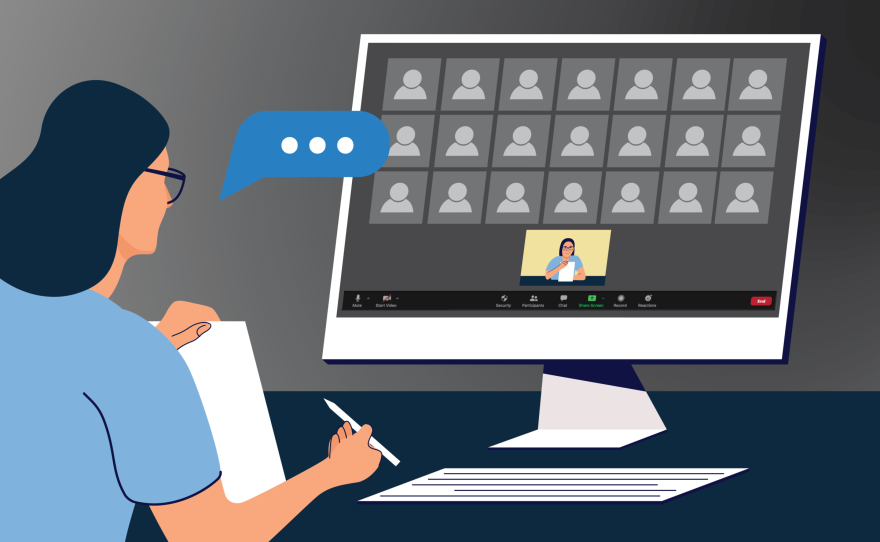